In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
file_path = 'data_summer_course.csv' 
df = pd.read_csv(file_path)
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
categorical_cols = df.select_dtypes(include=[object]).columns
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
date_cols = ['LASTVCEUSGDATE', 'LASTRECHRGDATE', 'FIRSTCALLDATE', 'LASTREVGENEVTDATE', 'FIRSTREVGENEVTDATE']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col].fillna(pd.to_datetime('2000-01-01'), inplace=True)
encoder = OneHotEncoder(handle_unknown='ignore')
cat_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
cat_encoded.columns = encoder.get_feature_names_out(categorical_cols)
df.drop(columns=categorical_cols, inplace=True)
df = pd.concat([df, cat_encoded], axis=1)
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

ValueError: Length mismatch: Expected axis has 1 elements, new values have 20191 elements

In [11]:
# data = pd.read_csv("data_summer_course.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Mobile_Number            200000 non-null  int64  
 1   MAINACTBAL               200000 non-null  float64
 2   LASTVCEUSGDATE           199981 non-null  object 
 3   LASTRECHRGDATE           199852 non-null  object 
 4   FIRSTCALLDATE            199981 non-null  object 
 5   DEVICETYPE               200000 non-null  object 
 6   ISDEVICE3GENABLED        200000 non-null  object 
 7   VASSUBSCRIBERFLAG        200000 non-null  object 
 8   ISDEVICEDATAENABLED      200000 non-null  object 
 9   AGEONNETWORK             200000 non-null  float64
 10  LASTREVGENEVTDATE        200000 non-null  object 
 11  SUBSRIBERLASTBALANCE     200000 non-null  float64
 12  last_app_used            79836 non-null   object 
 13  CUSTSEGMENT              51917 non-null   object 
 14  CNTC

In [4]:
data.shape

(200000, 30)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Mobile_Number            200000 non-null  int64  
 1   MAINACTBAL               200000 non-null  float64
 2   LASTVCEUSGDATE           199981 non-null  object 
 3   LASTRECHRGDATE           199852 non-null  object 
 4   FIRSTCALLDATE            199981 non-null  object 
 5   DEVICETYPE               200000 non-null  object 
 6   ISDEVICE3GENABLED        200000 non-null  object 
 7   VASSUBSCRIBERFLAG        200000 non-null  object 
 8   ISDEVICEDATAENABLED      200000 non-null  object 
 9   AGEONNETWORK             200000 non-null  float64
 10  LASTREVGENEVTDATE        200000 non-null  object 
 11  SUBSRIBERLASTBALANCE     200000 non-null  float64
 12  last_app_used            79836 non-null   object 
 13  CUSTSEGMENT              51917 non-null   object 
 14  CNTC

In [6]:
data.columns

Index(['Mobile_Number', 'MAINACTBAL', 'LASTVCEUSGDATE', 'LASTRECHRGDATE',
       'FIRSTCALLDATE', 'DEVICETYPE', 'ISDEVICE3GENABLED', 'VASSUBSCRIBERFLAG',
       'ISDEVICEDATAENABLED', 'AGEONNETWORK', 'LASTREVGENEVTDATE',
       'SUBSRIBERLASTBALANCE', 'last_app_used', 'CUSTSEGMENT', 'CNTCHURND1_30',
       'HANDSETCHANGESFLAGD1_30', 'DEVICENETWORK', 'DEVICEMODELC',
       'DEVICEDUALSIMFLAG', 'ARPUD1_30', 'SUMVCEREVCD1_30', 'SUMDATAREVCD1_30',
       'SUMDATAUSGCD1_30', 'SUMVOICEUSGCD1_30', 'SUMDATAUSG4GCD1_15',
       'SUMDATAUSG4GCD15_30', 'SMARTPHONEFLAG', 'MAINACTBAL1',
       'CNTZEROBALCD_1', 'FIRSTREVGENEVTDATE'],
      dtype='object')

In [7]:
data.dtypes

Mobile_Number                int64
MAINACTBAL                 float64
LASTVCEUSGDATE              object
LASTRECHRGDATE              object
FIRSTCALLDATE               object
DEVICETYPE                  object
ISDEVICE3GENABLED           object
VASSUBSCRIBERFLAG           object
ISDEVICEDATAENABLED         object
AGEONNETWORK               float64
LASTREVGENEVTDATE           object
SUBSRIBERLASTBALANCE       float64
last_app_used               object
CUSTSEGMENT                 object
CNTCHURND1_30              float64
HANDSETCHANGESFLAGD1_30    float64
DEVICENETWORK               object
DEVICEMODELC                object
DEVICEDUALSIMFLAG          float64
ARPUD1_30                  float64
SUMVCEREVCD1_30            float64
SUMDATAREVCD1_30           float64
SUMDATAUSGCD1_30           float64
SUMVOICEUSGCD1_30          float64
SUMDATAUSG4GCD1_15         float64
SUMDATAUSG4GCD15_30        float64
SMARTPHONEFLAG              object
MAINACTBAL1                float64
CNTZEROBALCD_1      

In [8]:
data['DEVICETYPE'].value_counts()

DEVICETYPE
Voice Centric    99643
Smartphone       99023
Feature +         1334
Name: count, dtype: int64

In [9]:
data['ISDEVICE3GENABLED'].value_counts()

ISDEVICE3GENABLED
N    101035
Y     98965
Name: count, dtype: int64

In [10]:
data['ISDEVICEDATAENABLED'].value_counts()

ISDEVICEDATAENABLED
Y    127802
N     72198
Name: count, dtype: int64

In [11]:
data['CUSTSEGMENT'].value_counts()

CUSTSEGMENT
Basic        30061
Silver       13723
Gold          7632
Platinum       498
Signature        3
Name: count, dtype: int64

In [12]:
data['DEVICENETWORK'].value_counts()

DEVICENETWORK
4G    53857
1G    47091
2G    13810
3G     5256
5G     1630
Name: count, dtype: int64

In [15]:
data.drop(['Mobile_Number'], axis=1, inplace=True)

In [17]:
data.describe()

,MAINACTBAL,AGEONNETWORK,SUBSRIBERLASTBALANCE,CNTCHURND1_30,HANDSETCHANGESFLAGD1_30,DEVICEDUALSIMFLAG,ARPUD1_30,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,MAINACTBAL1,CNTZEROBALCD_1
count,200000.000000,200000.000000,200000.000000,89137.000000,35507.000000,121644.00000,200000.000000,154881.000000,151717.000000,1.551420e+05,155142.000000,1.497920e+05,1.520080e+05,200000.000000,200000.000000
mean,11.007088,1993.406405,11.007088,1.843398,1.364942,1.99649,176.082796,43.608401,2.491229,4.339707e+09,7641.116912,1.875771e+09,2.041547e+09,11.007088,0.003020
std,48.991782,1774.404666,48.991782,1.031201,0.789854,0.44538,297.788781,87.563824,6.910859,1.172820e+10,13910.996894,5.541364e+09,5.982678e+09,48.991782,0.054872
min,0.000000,101.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.008600,531.000000,0.008600,1.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000e+00,435.000000,0.000000e+00,0.000000e+00,0.008610,0.000000
50%,0.141900,1369.000000,0.141900,2.000000,1.000000,2.00000,58.000000,9.217591,0.000000,1.327200e+04,2573.000000,0.000000e+00,0.000000e+00,0.141880,0.000000
75%,8.298200,3129.000000,8.298200,2.000000,2.000000,2.00000,216.000000,50.621675,0.455455,1.666354e+09,8977.750000,9.751026e+07,1.794456e+08,8.298160,0.000000
max,4909.386900,6638.000000,4909.386900,8.000000,30.000000,6.00000,9251.000000,5313.730175,225.059835,2.380753e+11,666309.000000,1.588541e+11,1.048388e+11,4909.386700,1.000000


In [19]:
data.describe(include='object')

,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,LASTREVGENEVTDATE,last_app_used,CUSTSEGMENT,DEVICENETWORK,DEVICEMODELC,SMARTPHONEFLAG,FIRSTREVGENEVTDATE
count,199981,199852,199981,200000,200000,200000,200000,200000,79836,51917,121644,121644,200000,200000
unique,180,1472,6509,3,2,2,2,91,471,5,5,4969,2,6471
top,04/16/2023 00:00:00,04/16/2023 00:00:00,07/06/2020 00:00:00,Voice Centric,N,N,Y,04/16/2023 00:00:00,2023-04-17,Basic,4G,Itel Technology Limited IT2171/Value 110,N,12/31/2011 00:00:00
freq,159154,24185,279,99643,101035,196941,127802,101093,7035,30061,53857,2834,100717,307


In [21]:
data[data.duplicated()]

,MAINACTBAL,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,AGEONNETWORK,LASTREVGENEVTDATE,...,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,SMARTPHONEFLAG,MAINACTBAL1,CNTZEROBALCD_1,FIRSTREVGENEVTDATE
149192,55.3338,03/05/2023 00:00:00,02/08/2023 00:00:00,02/11/2022 00:00:00,Voice Centric,N,N,Y,435.0,02/08/2023 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,N,55.33375,0,02/06/2022 00:00:00


In [23]:
data[data.duplicated()].sum()

MAINACTBAL                                                       55.3338
LASTVCEUSGDATE                                       03/05/2023 00:00:00
LASTRECHRGDATE                                       02/08/2023 00:00:00
FIRSTCALLDATE                                        02/11/2022 00:00:00
DEVICETYPE                                                 Voice Centric
ISDEVICE3GENABLED                                                      N
VASSUBSCRIBERFLAG                                                      N
ISDEVICEDATAENABLED                                                    Y
AGEONNETWORK                                                       435.0
LASTREVGENEVTDATE                                    02/08/2023 00:00:00
SUBSRIBERLASTBALANCE                                             55.3338
last_app_used                                                          0
CUSTSEGMENT                                                            0
CNTCHURND1_30                                      

In [17]:
# can  conclude that there is no duplicate data

In [25]:
data.isnull().sum()

MAINACTBAL                      0
LASTVCEUSGDATE                 19
LASTRECHRGDATE                148
FIRSTCALLDATE                  19
DEVICETYPE                      0
ISDEVICE3GENABLED               0
VASSUBSCRIBERFLAG               0
ISDEVICEDATAENABLED             0
AGEONNETWORK                    0
LASTREVGENEVTDATE               0
SUBSRIBERLASTBALANCE            0
last_app_used              120164
CUSTSEGMENT                148083
CNTCHURND1_30              110863
HANDSETCHANGESFLAGD1_30    164493
DEVICENETWORK               78356
DEVICEMODELC                78356
DEVICEDUALSIMFLAG           78356
ARPUD1_30                       0
SUMVCEREVCD1_30             45119
SUMDATAREVCD1_30            48283
SUMDATAUSGCD1_30            44858
SUMVOICEUSGCD1_30           44858
SUMDATAUSG4GCD1_15          50208
SUMDATAUSG4GCD15_30         47992
SMARTPHONEFLAG                  0
MAINACTBAL1                     0
CNTZEROBALCD_1                  0
FIRSTREVGENEVTDATE              0
dtype: int64

In [19]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data(data)

,Total,Percent
HANDSETCHANGESFLAGD1_30,164493,82.2465
CUSTSEGMENT,148083,74.0415
last_app_used,120164,60.0820
CNTCHURND1_30,110863,55.4315
DEVICEMODELC,78356,39.1780
DEVICENETWORK,78356,39.1780
DEVICEDUALSIMFLAG,78356,39.1780
SUMDATAUSG4GCD1_15,50208,25.1040
SUMDATAREVCD1_30,48283,24.1415
SUMDATAUSG4GCD15_30,47992,23.9960


In [20]:
df_cleaned = data
columns_to_drop = ['last_app_used', 'CNTCHURND1_30', 'HANDSETCHANGESFLAGD1_30']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Dropping rows with missing values in critical columns
# df_cleaned = df_cleaned.dropna(subset=['LASTVCEUSGDATE', 'LASTRECHRGDATE', 'FIRSTCALLDATE'])

# Filling missing values in other columns with median (for numerical) or mode (for categorical)
for col in df_cleaned.select_dtypes(include=['float64']):
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

df_cleaned.head()

,Mobile_Number,MAINACTBAL,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,AGEONNETWORK,...,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,SMARTPHONEFLAG,MAINACTBAL1,CNTZEROBALCD_1,FIRSTREVGENEVTDATE
0,61159748,0.2630,04/16/2023 00:00:00,04/08/2023 00:00:00,04/14/2022 00:00:00,Smartphone,Y,N,Y,368.0,...,22.985625,0.00000,1.133457e+10,12878.0,275794501.0,1.105682e+10,Y,0.26304,0,04/14/2022 00:00:00
1,17488035,0.1901,04/15/2023 00:00:00,03/26/2023 00:00:00,06/13/2007 00:00:00,Smartphone,Y,N,Y,5786.0,...,26.570050,0.00000,0.000000e+00,652.0,0.0,0.000000e+00,Y,0.19011,0,06/14/2007 00:00:00
2,43749562,0.1243,04/01/2023 00:00:00,01/31/2023 00:00:00,02/16/2022 00:00:00,Voice Centric,N,N,N,425.0,...,9.217591,0.00000,1.327200e+04,2573.0,0.0,0.000000e+00,N,0.12430,0,02/16/2022 00:00:00
3,87451055,1.6096,04/16/2023 00:00:00,04/11/2023 00:00:00,06/29/2013 00:00:00,Smartphone,Y,N,Y,3570.0,...,30.480910,0.52052,4.288550e+05,2721.0,426609.0,2.246000e+03,Y,1.60957,0,07/08/2013 00:00:00
4,64576359,5.1838,04/16/2023 00:00:00,04/10/2023 00:00:00,04/30/2012 00:00:00,Voice Centric,N,N,N,3999.0,...,95.027229,0.00000,0.000000e+00,3123.0,0.0,0.000000e+00,N,5.18376,0,05/05/2012 00:00:00


In [21]:
df_cleaned.shape

(200000, 27)

In [22]:
df_cleaned.isnull().sum()

Mobile_Number                0
MAINACTBAL                   0
LASTVCEUSGDATE              19
LASTRECHRGDATE             148
FIRSTCALLDATE               19
DEVICETYPE                   0
ISDEVICE3GENABLED            0
VASSUBSCRIBERFLAG            0
ISDEVICEDATAENABLED          0
AGEONNETWORK                 0
LASTREVGENEVTDATE            0
SUBSRIBERLASTBALANCE         0
CUSTSEGMENT             148083
DEVICENETWORK            78356
DEVICEMODELC             78356
DEVICEDUALSIMFLAG            0
ARPUD1_30                    0
SUMVCEREVCD1_30              0
SUMDATAREVCD1_30             0
SUMDATAUSGCD1_30             0
SUMVOICEUSGCD1_30            0
SUMDATAUSG4GCD1_15           0
SUMDATAUSG4GCD15_30          0
SMARTPHONEFLAG               0
MAINACTBAL1                  0
CNTZEROBALCD_1               0
FIRSTREVGENEVTDATE           0
dtype: int64

In [23]:
df_cleaned['LASTVCEUSGDATE'].fillna(df_cleaned['LASTVCEUSGDATE'].mode()[0], inplace =True)
df_cleaned['LASTRECHRGDATE'].fillna(df_cleaned['LASTRECHRGDATE'].mode()[0], inplace =True)
df_cleaned['FIRSTCALLDATE'].fillna(df_cleaned['FIRSTCALLDATE'].mode()[0], inplace =True)
df_cleaned['CUSTSEGMENT'].fillna(df_cleaned['CUSTSEGMENT'].mode()[0], inplace =True)
df_cleaned['DEVICENETWORK'].fillna(df_cleaned['DEVICENETWORK'].mode()[0], inplace =True)
df_cleaned['DEVICEMODELC'].fillna(df_cleaned['DEVICEMODELC'].mode()[0], inplace =True)

In [24]:
df_cleaned.isnull().sum()

Mobile_Number           0
MAINACTBAL              0
LASTVCEUSGDATE          0
LASTRECHRGDATE          0
FIRSTCALLDATE           0
DEVICETYPE              0
ISDEVICE3GENABLED       0
VASSUBSCRIBERFLAG       0
ISDEVICEDATAENABLED     0
AGEONNETWORK            0
LASTREVGENEVTDATE       0
SUBSRIBERLASTBALANCE    0
CUSTSEGMENT             0
DEVICENETWORK           0
DEVICEMODELC            0
DEVICEDUALSIMFLAG       0
ARPUD1_30               0
SUMVCEREVCD1_30         0
SUMDATAREVCD1_30        0
SUMDATAUSGCD1_30        0
SUMVOICEUSGCD1_30       0
SUMDATAUSG4GCD1_15      0
SUMDATAUSG4GCD15_30     0
SMARTPHONEFLAG          0
MAINACTBAL1             0
CNTZEROBALCD_1          0
FIRSTREVGENEVTDATE      0
dtype: int64

In [25]:
# outliers present so we cannot use mean to impute missing values 

### Data Transformation

In [27]:
# categorical_col = df_cleaned.select_dtypes(include=['object']).columns 
# col_enco = LabelEncoder()
# enco_dict={}
# for col in categorical_col:
#     enco_dict=LabelEncoder()
#     df_cleaned[col] = col_enco.fit_transform(df_cleaned[col])

In [28]:
categorical_col = df_cleaned.select_dtypes(include=['object']).columns 
le = LabelEncoder()
df_cleaned[categorical_col] = df_cleaned[categorical_col].apply(le.fit_transform)

In [29]:
df_cleaned.head()

,Mobile_Number,MAINACTBAL,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,AGEONNETWORK,...,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,SMARTPHONEFLAG,MAINACTBAL1,CNTZEROBALCD_1,FIRSTREVGENEVTDATE
0,61159748,0.2630,105,426,1892,1,1,0,1,368.0,...,22.985625,0.00000,1.133457e+10,12878.0,275794501.0,1.105682e+10,1,0.26304,0,1823
1,17488035,0.1901,104,368,2945,1,1,0,1,5786.0,...,26.570050,0.00000,0.000000e+00,652.0,0.0,0.000000e+00,1,0.19011,0,2890
2,43749562,0.1243,90,132,836,2,0,0,0,425.0,...,9.217591,0.00000,1.327200e+04,2573.0,0.0,0.000000e+00,0,0.12430,0,800
3,87451055,1.6096,105,438,3233,1,1,0,1,3570.0,...,30.480910,0.52052,4.288550e+05,2721.0,426609.0,2.246000e+03,1,1.60957,0,3323
4,64576359,5.1838,105,434,2168,2,0,0,0,3999.0,...,95.027229,0.00000,0.000000e+00,3123.0,0.0,0.000000e+00,0,5.18376,0,2185


#### Standardization

In [31]:
scaler = StandardScaler()
data1 = scaler.fit_transform(df_cleaned)
data1

array([[ 0.54220155, -0.21930443,  0.33176228, ..., -0.21930361,
        -0.0550377 , -0.86831151],
       [-0.96366621, -0.22079244,  0.26947366, ..., -0.22079223,
        -0.0550377 , -0.31582607],
       [-0.05812841, -0.22213553, -0.60256704, ..., -0.22213552,
        -0.0550377 , -1.39801404],
       ...,
       [ 0.53469888, -0.22449103,  0.33176228, ..., -0.22449082,
        -0.0550377 ,  1.29761781],
       [-0.75243446, -0.01597799,  0.33176228, ..., -0.0159786 ,
        -0.0550377 , -0.39919079],
       [ 1.76704286, -0.2232051 ,  0.33176228, ..., -0.2232055 ,
        -0.0550377 ,  0.71665374]])

In [32]:
data1 = pd.DataFrame(data1)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.542202,-0.219304,0.331762,-0.051811,-0.835012,-0.957996,1.010404,-0.12463,0.751612,-0.916031,...,-0.164117,-0.309156,0.759824,0.512636,-0.232126,1.797474,1.007196,-0.219304,-0.055038,-0.868312
1,-0.963666,-0.220792,0.269474,-0.277174,-0.288217,-0.957996,1.010404,-0.12463,0.751612,2.137395,...,-0.118389,-0.309156,-0.321005,-0.470713,-0.288826,-0.293426,1.007196,-0.220792,-0.055038,-0.315826
2,-0.058128,-0.222136,-0.602567,-1.194172,-1.383364,0.990953,-0.989703,-0.12463,-1.330474,-0.883908,...,-0.339762,-0.309156,-0.321004,-0.316205,-0.288826,-0.293426,-0.992856,-0.222136,-0.055038,-1.398014
3,1.448766,-0.191818,0.331762,-0.005184,-0.138666,-0.957996,1.010404,-0.12463,0.751612,0.888522,...,-0.068496,-0.224004,-0.320964,-0.304302,-0.288738,-0.293426,1.007196,-0.191819,-0.055038,-0.091622
4,0.660012,-0.118863,0.331762,-0.020726,-0.691692,0.990953,-0.989703,-0.12463,-1.330474,1.130294,...,0.754952,-0.309156,-0.321005,-0.271968,-0.288826,-0.293426,-0.992856,-0.118864,-0.055038,-0.680870


In [33]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,...,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,-1.008171e-16,4.149570e-17,1.975664e-16,5.702994e-17,-4.469314e-17,1.813305e-16,-1.209344e-16,1.382006e-17,5.053735e-17,5.130119e-17,...,-1.501732e-16,4.220624e-17,8.171241e-19,1.421085e-18,4.646949e-17,-9.663381e-18,-5.108802e-17,-3.424816e-17,1.129763e-17,-4.700240e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.566597e+00,-2.246727e-01,-6.208543e+00,-1.707068e+00,-1.817476e+00,-2.906946e+00,-9.897030e-01,-1.246297e-01,-1.330474e+00,-1.066505e+00,...,-4.573554e-01,-3.091560e-01,-3.210054e-01,-5.231542e-01,-2.888256e-01,-2.934263e-01,-9.928555e-01,-2.246727e-01,-5.503770e-02,-1.812249e+00
25%,-8.716641e-01,-2.244972e-01,3.317623e-01,-3.859707e-01,-8.625330e-01,-9.579963e-01,-9.897030e-01,-1.246297e-01,-1.330474e+00,-8.241694e-01,...,-4.573554e-01,-3.091560e-01,-3.210054e-01,-4.559943e-01,-2.888256e-01,-2.934263e-01,-9.928555e-01,-2.244969e-01,-5.503770e-02,-8.709005e-01
50%,-1.156867e-01,-2.217763e-01,3.317623e-01,-2.072598e-02,8.565946e-02,-9.579963e-01,-9.897030e-01,-1.246297e-01,7.516121e-01,-3.518972e-01,...,-3.397623e-01,-3.091560e-01,-3.210041e-01,-3.162053e-01,-2.888256e-01,-2.934263e-01,-9.928555e-01,-2.217767e-01,-5.503770e-02,8.805269e-02
75%,7.773192e-01,-5.529284e-02,3.317623e-01,6.087123e-02,8.827435e-01,9.909530e-01,1.010404e+00,-1.246297e-01,7.516121e-01,6.399873e-01,...,-3.288215e-02,-3.048984e-01,-2.922541e-01,-1.595661e-02,-2.888231e-01,-2.934172e-01,1.007196e+00,-5.529366e-02,-5.503770e-02,8.859721e-01
max,1.881063e+00,9.998395e+01,4.941120e+00,4.008622e+00,1.561953e+00,9.909530e-01,1.010404e+00,8.023767e+00,7.516121e-01,2.617557e+00,...,6.733240e+01,3.650864e+01,2.238112e+01,5.306871e+01,3.236963e+01,1.953213e+01,1.007196e+00,9.998395e+01,1.816937e+01,1.537874e+00


In [34]:
corrs = data1.corr()
corrs

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.000000,-0.024558,-0.029877,-0.008728,0.019068,0.008892,-0.006564,-0.016235,-0.009917,-0.215917,...,-0.022682,0.008539,0.000122,-0.026395,-0.002563,-0.001079,-0.006816,-0.024558,-0.005173,0.010312
1,-0.024558,1.000000,0.024643,-0.006517,-0.007246,-0.007424,0.003721,0.057668,0.011335,0.099546,...,0.150328,0.036311,0.002966,0.011093,0.003584,0.001798,0.003853,1.000000,-0.012365,-0.004769
2,-0.029877,0.024643,1.000000,0.078510,-0.024330,0.009471,-0.009176,0.040190,-0.011704,0.129730,...,0.112284,0.096121,0.101338,0.108480,0.094367,0.089723,-0.009527,0.024643,-0.023339,-0.022206
3,-0.008728,-0.006517,0.078510,1.000000,0.002370,0.019876,-0.020822,0.001127,-0.013148,0.044281,...,-0.000521,-0.005429,-0.007033,0.014217,-0.002321,-0.009975,-0.020572,-0.006517,0.025264,0.005882
4,0.019068,-0.007246,-0.024330,0.002370,1.000000,-0.016956,0.018766,-0.005848,0.015014,-0.071088,...,-0.008327,0.006002,0.002611,-0.009533,0.001594,0.002221,0.017626,-0.007246,0.004035,0.965536
5,0.008892,-0.007424,0.009471,0.019876,-0.016956,1.000000,-0.915894,0.024009,-0.744609,0.146014,...,0.091050,-0.256828,-0.287460,0.044927,-0.257611,-0.266227,-0.946903,-0.007424,0.003216,-0.012065
6,-0.006564,0.003721,-0.009176,-0.020822,0.018766,-0.915894,1.000000,-0.024664,0.743873,-0.163318,...,-0.096612,0.270817,0.304398,-0.047714,0.273252,0.282198,0.961882,0.003721,-0.004351,0.013236
7,-0.016235,0.057668,0.040190,0.001127,-0.005848,0.024009,-0.024664,1.000000,-0.019573,0.059906,...,0.140880,0.038514,0.016289,0.030572,0.015199,0.011415,-0.025630,0.057668,-0.006859,-0.004051
8,-0.009917,0.011335,-0.011704,-0.013148,0.015014,-0.744609,0.743873,-0.019573,1.000000,-0.110298,...,-0.075983,0.202867,0.226608,-0.043933,0.202951,0.209744,0.746242,0.011335,0.001335,0.011504
9,-0.215917,0.099546,0.129730,0.044281,-0.071088,0.146014,-0.163318,0.059906,-0.110298,1.000000,...,0.150398,-0.070371,-0.097986,0.118272,-0.094493,-0.099639,-0.160716,0.099546,0.000453,-0.034222


<Axes: >

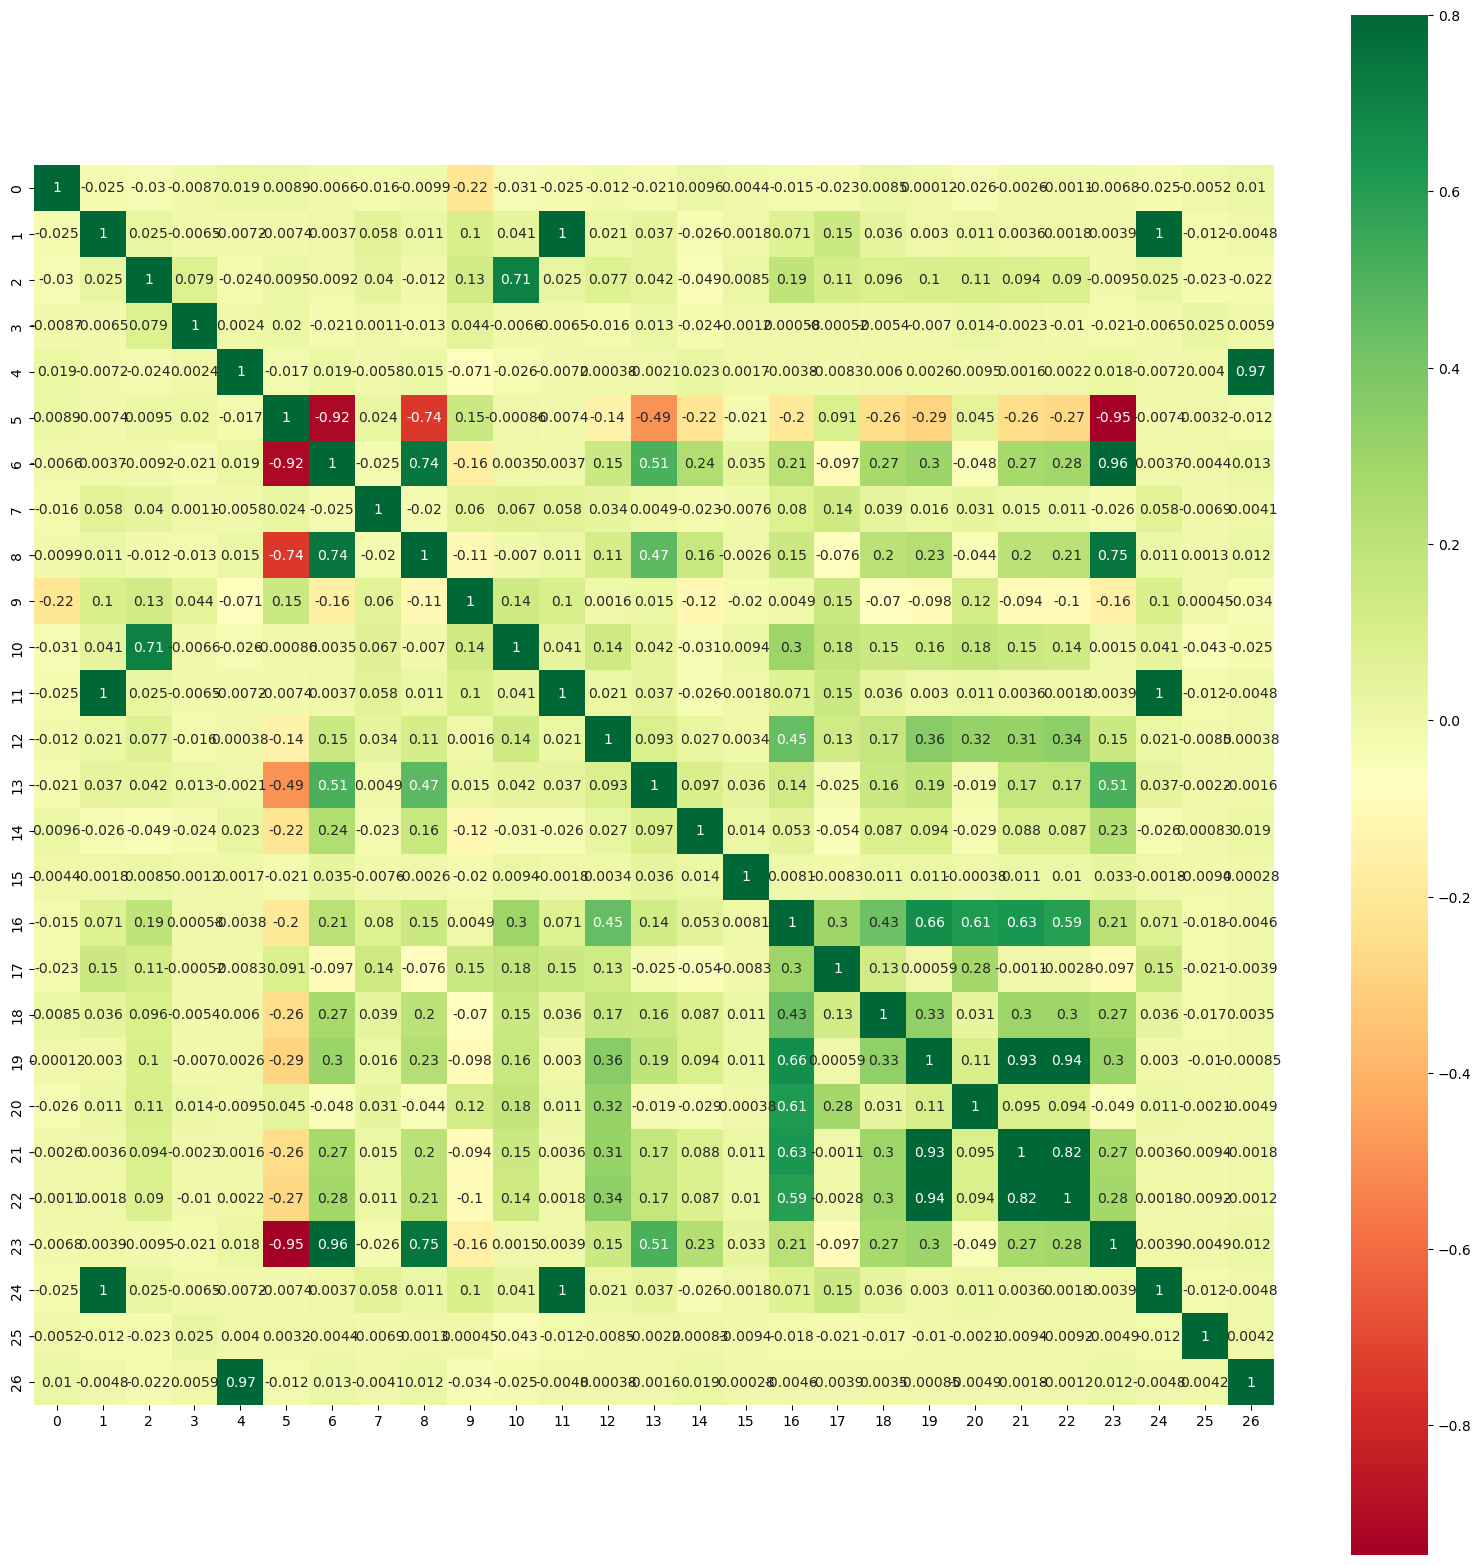

In [69]:
matrix = data1.corr()
plt.subplots(figsize=(20,20)) # defines width and height of fig we want to create
sns.heatmap(matrix,vmax=.8,square=True,cmap='RdYlGn',annot=True)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and target (y) - Assuming 'ARPUD1_30' as the target variable for prediction
X = df_cleaned.drop('ARPUD1_30', axis=1)
y = df_cleaned['ARPUD1_30']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LogisticRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store model performance
performance = {}

# Training and evaluating the models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store performance metrics
    performance[name] = {"MSE": mse, "R2 Score": r2}

# Output the performance of each model
for model_name, metrics in performance.items():
    print(f"Model: {model_name}")
    print(f"MSE: {metrics['MSE']}")
    print(f"R2 Score: {metrics['R2 Score']}")
    print("-" * 30)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_cleaned.drop('ARPUD1_30', axis=1)
y = df_cleaned['ARPUD1_30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.intercept_)

# obtain the slope of the regression line equation
print(model.coef_) 

Y_Pred=model.predict(X_test)
Y_Pred

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [103]:
y.head()

0    620.0
1    100.0
2      0.0
3     91.0
4     88.0
Name: ARPUD1_30, dtype: float64